<a href="https://colab.research.google.com/github/CM-007/pythonCode_DS/blob/main/SimpleLinearRegression(waist_circumference_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# *Load Data Set*

In [2]:
data =pd.read_csv('/content/WC_AT.csv')
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


# *Correlation*

In [4]:
data.corr() #check Waist vs. AT

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<ipython-input-6-5d141f04d0df>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Waist) # density plot for daily


<Axes: xlabel='Waist', ylabel='Density'>

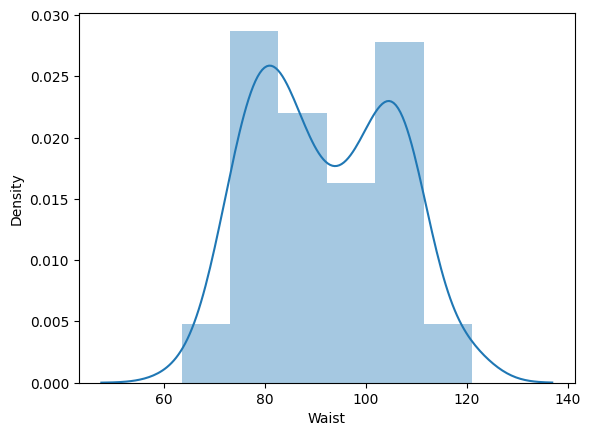

In [6]:
import seaborn as sns
sns.distplot(data.Waist) # density plot for Waist

<ipython-input-7-ae7b999271c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.AT) # density plot for AT


<Axes: xlabel='AT', ylabel='Density'>

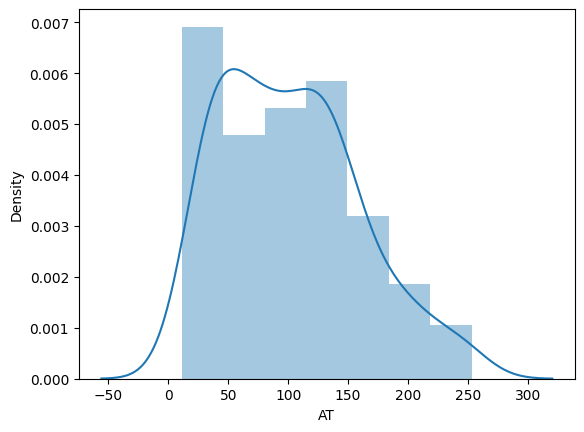

In [7]:
sns.distplot(data.AT) # density plot for AT

# **Fitting Linear Regression Model**

In [8]:
import statsmodels.formula.api as smf

model = smf.ols("AT~Waist",data=data).fit()
# ols(Ordinary List Square) - find the distance

In [9]:
# Coefficients are B0 and B1
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [10]:
# R squared value
(model.rsquared,model.rsquared_adj)

(0.670036893052843, 0.6669531256981966)

<Axes: xlabel='Waist', ylabel='AT'>

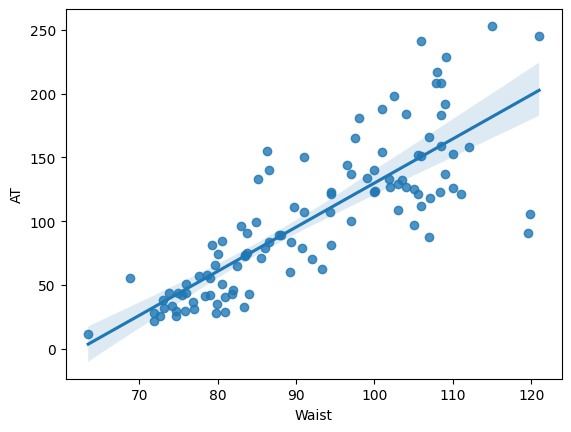

In [11]:
sns.regplot(x='Waist',y='AT',data=data) # how to print regression line

In [12]:
print("***T Values :***\n",model.tvalues,'\n','***P Values :***\n',model.pvalues)

***T Values :***
 Intercept    -9.909103
Waist        14.740376
dtype: float64 
 ***P Values :***
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [13]:
# 1100 manual calculation
(1.3*1100)+13.835630

1443.83563

# Predict for new data point

In [14]:
newdata = pd.Series([40,75,120])
newdata

0     40
1     75
2    120
dtype: int64

In [15]:
data_pred = pd.DataFrame(newdata,columns=['Waist'])
data_pred

,Waist
0,40
1,75
2,120


In [16]:
model.predict(data_pred)

0    -77.627112
1     43.432966
2    199.081639
dtype: float64